# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [50]:
# Import the titanic dataset here
import pandas as pd
import numpy as np
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")
df_titanic.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1


In [44]:
#practice
#df_titanic = df_titanic[(df_titanic["gender"] == "male") & (df_titanic["age"] > 30)] #and works differently from &
#df_titanic.head()

## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [54]:
# Code here
df_titanic["type"] = df_titanic["class"].map({
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger",
    "victualling crew": "crew",
    "engineering crew": "crew",
    "deck crew": "crew"
})

df_titanic = df_titanic[df_titanic["type"] == "passenger"]
df_titanic
pd.crosstab(df_titanic["class"], df_titanic["embarked"],normalize = True) # normalize = true gives joint distribution


embarked,B,C,Q,S
class,,,,
1st,0.002278,0.108580,0.002278,0.132878
2nd,0.004556,0.019742,0.005315,0.186029
3rd,0.000000,0.077449,0.085801,0.375095


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [60]:
# Code here
df_titanic.groupby("embarked")["class"].value_counts(normalize = True) #conditonal distribution of their class given where they embarked

# What proportion of Southampton passengers were in 3rd class?
print("The proportion of Southampton passengers that were in the 3rd class was about 0.5404.")

The proportion of Southampton passengers that were in the 3rd class was about 0.5404.


In [62]:
# Code here
df_titanic.groupby("class")["embarked"].value_counts(normalize = True) #conditonal distribution of where they embarked given their class

# What proportion of 3rd class passengers embarked at Southampton?
print("The proportion of 3rd class passengers that embarked at Southampton is about 0.6967.")

The proportion of 3rd class passengers that embarked at Southampton is about 0.6967.


## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

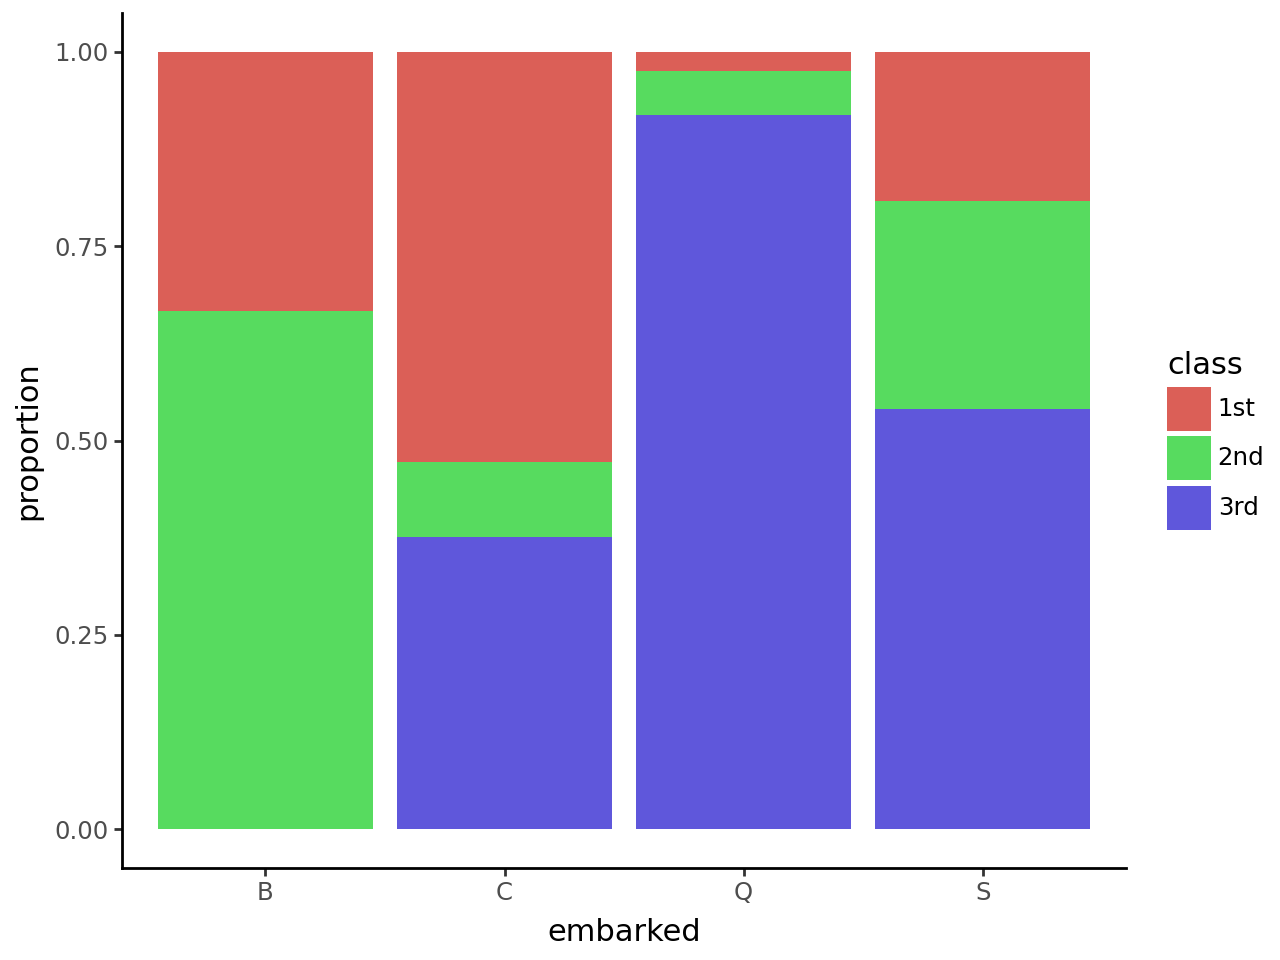

In [73]:
# Code here
from plotnine import *
(
    ggplot(df_titanic, aes(x = "embarked", fill = "class"))
    + geom_bar(position = "fill")
    + theme_classic()
    +labs(y = "proportion")
)